<a href="https://colab.research.google.com/github/satogen/datascience_tips/blob/main/table/EDA_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from functools import partial
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
import sweetviz as sv
from IPython.display import HTML

from matplotlib_venn import venn2
import warnings 

In [ ]:
# warningを表示しないようにする。
warnings.filterwarnings('ignore')

# データフレームの表示数を増やす
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 10000)

# データフレームの指数表記をしないようにする
pd.options.display.float_format = '{:.2f}'.format

# seabornのデフォルトスタイルを適用
sns.set()

## 参考
- 【2日目】色んなEDAを試してみる【2021アドベントカレンダー】
(https://zenn.dev/megane_otoko/articles/2021ad_02_explanatory_data_analysis)

- Kaggle テーブルデータコンペで使うスニペット・Tips 集 
(https://qiita.com/TaigoKuriyama/items/8f9286b5c882819adebb)

- Pythonデータ可視化に使えるseaborn 25メソッド
(https://qiita.com/kakiuchis/items/f7c830a2b726992a6165)

- 【随時更新】Kaggleテーブルデータコンペできっと役立つTipsまとめ
https://naotaka1128.hatenadiary.jp/entry/kaggle-compe-tips

- Pandas_Cheat_Sheet
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [4]:
# !pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# !pip install pandas-profiling
# !pip install --upgrade pandas_profiling

In [ ]:
# !pip install sweetviz

In [3]:
class CFG:
  ## データフレーム情報
  TrainDataPath = False
  TestDataPath = False
  TargetCol = "price"

  ## 前処理の設定
  CatPattern = 2
  NumPatter = 2

  ## クロスバリデーション
  KFold = 5

## 基本設定

In [75]:
# データセットを読み込む
if CFG.TrainDataPath:
  train_df = pd.read_csv(CFG.DataPath)
  train_len = len(train_df)
  train_df["flug"] = 0
  test_df = pd.read_csv(CFG.TestDataPath)
  test_df["flug"] = 1
  df = pd.concat([train_df, test_df], axis=0)
else:
  df = sns.load_dataset('diamonds')
  train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
  train_df["flug"] = 0
  test_df["flug"] = 1
  df = pd.concat([train_df, test_df], axis=0)


## EDA

### 行数と列数の確認

In [73]:
if CFG.TrainDataPath:
  print(f"{train_df.shape[0]} rows and {train_df.shape[1]} features in train set")
  print(f"{test_df.shape[1]} rows and {test_df.shape[1]} features in test set")
else:
  print(f"{df.shape[0]} rows and {df.shape[1]} features in train set")

53940 rows and 10 features in train set


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [14]:
# ProfileReport(df)
# メモリエラーが生じる場合に下記を使用する
# 相関係数等の処理が重い計算を省いていてくれる
# https://satoblo.com/pandas-profiling-minimal-true/ より
ProfileReport(df,minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



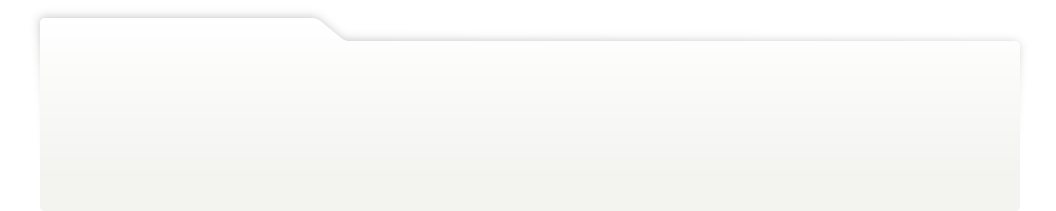
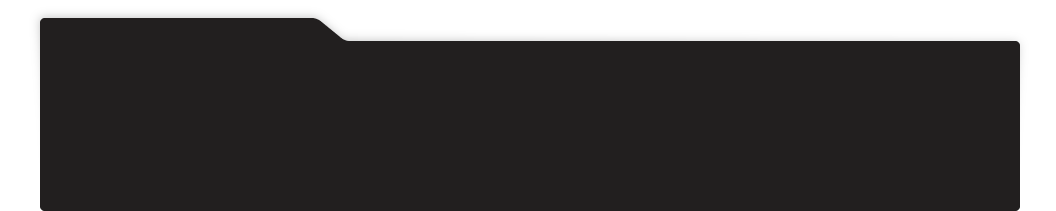
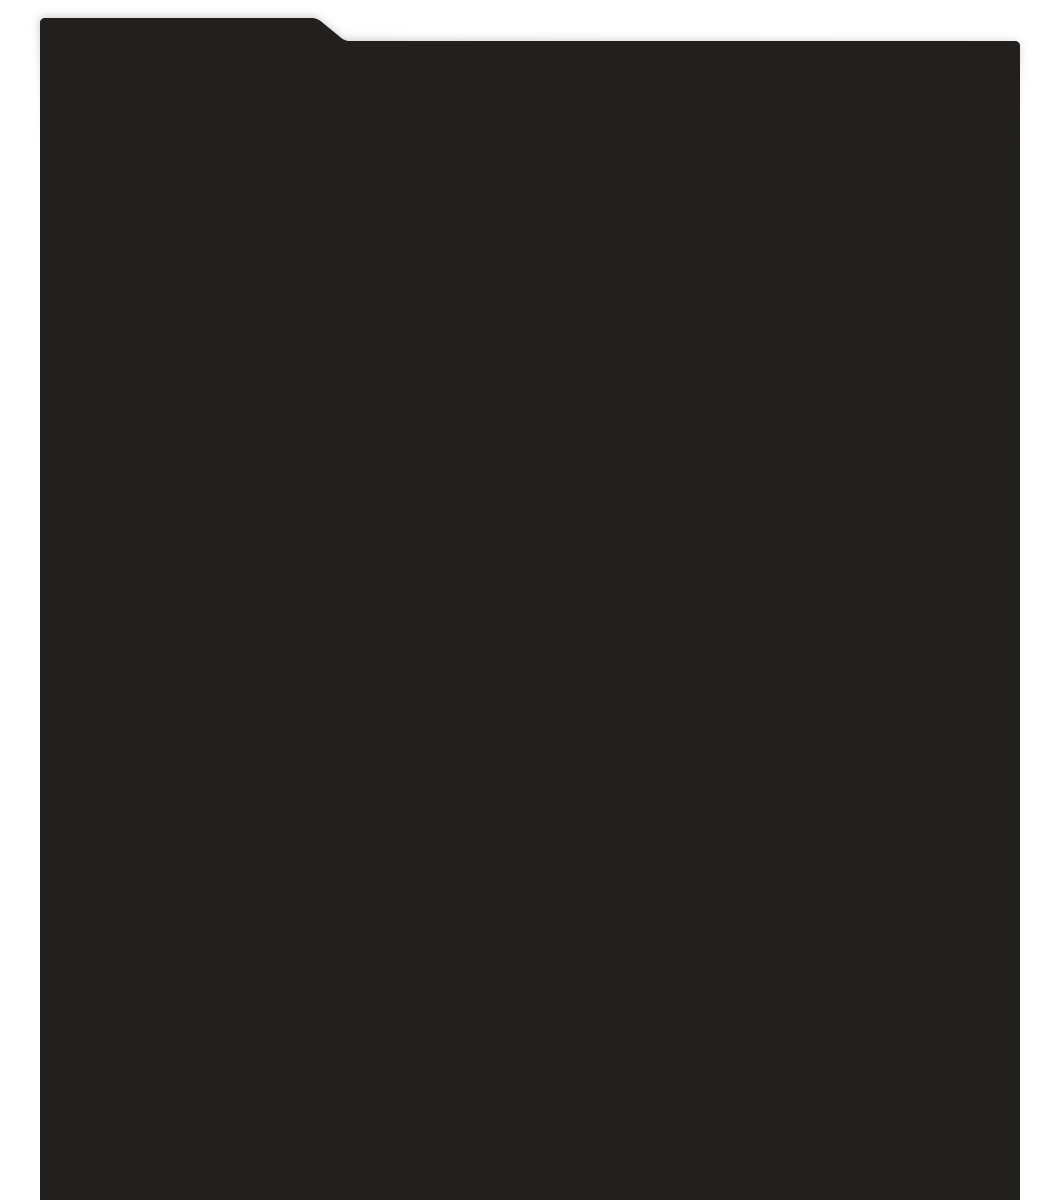
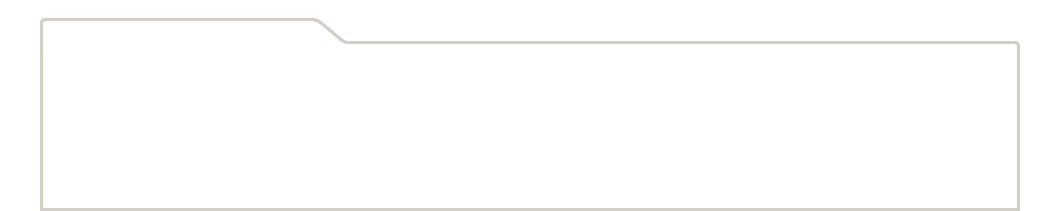
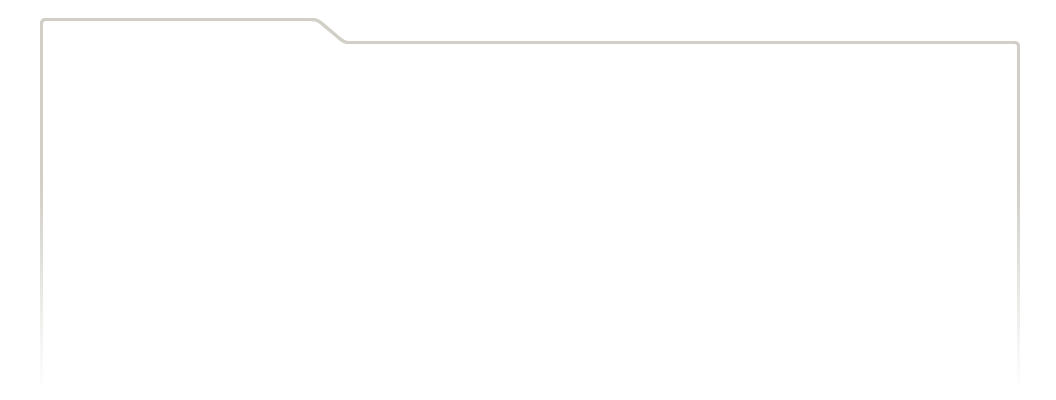
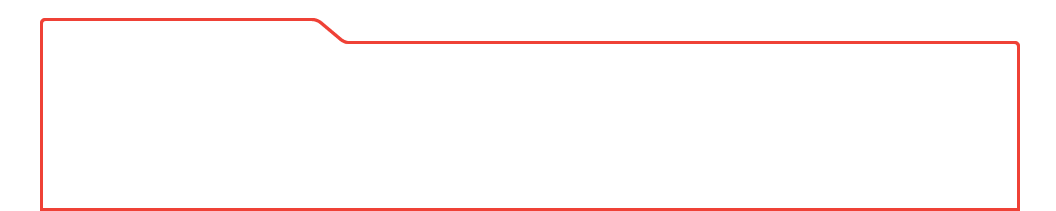
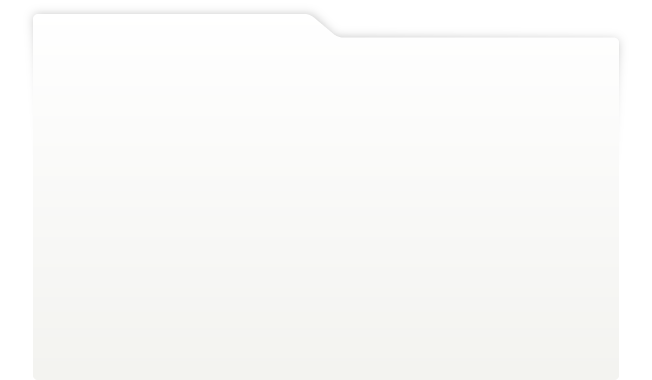
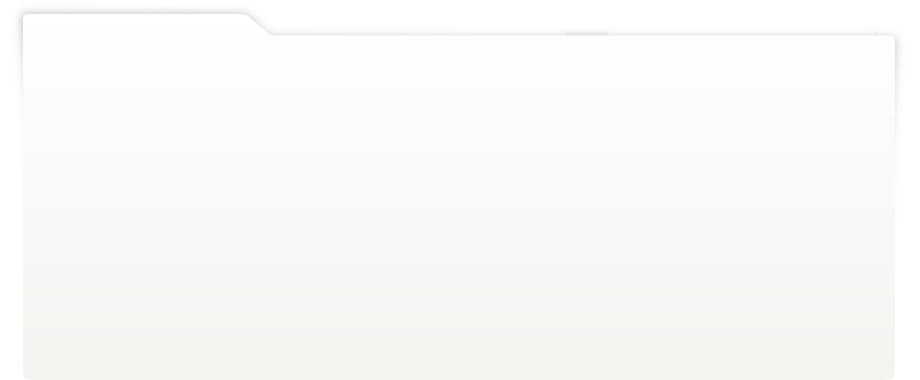
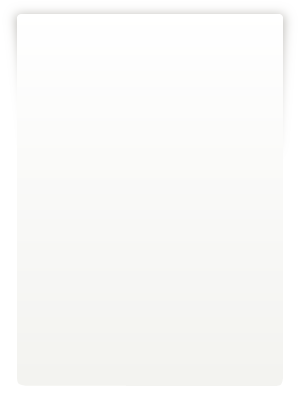
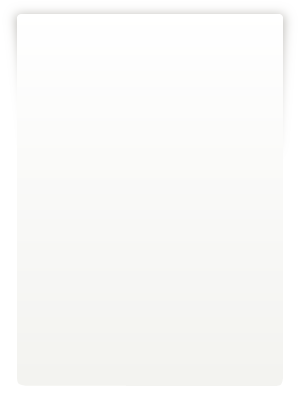
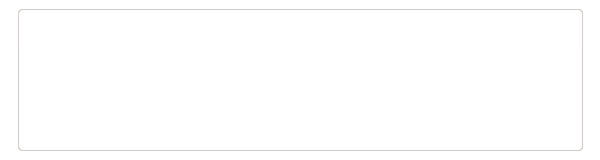
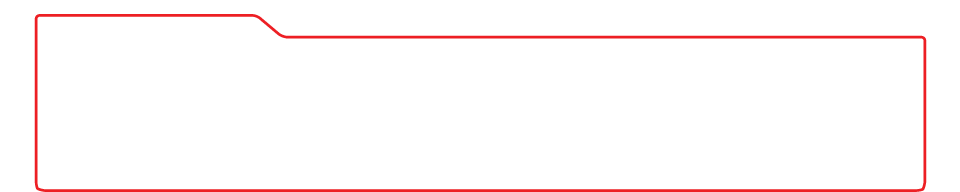
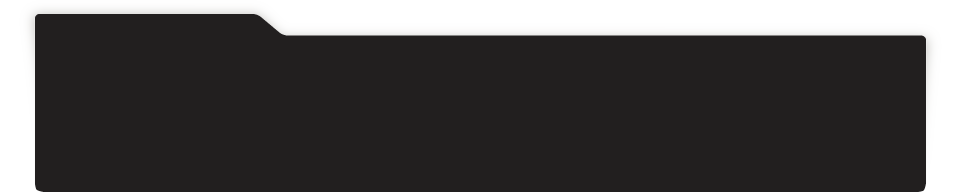
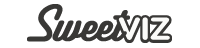
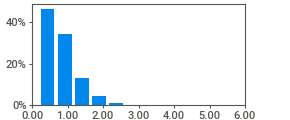
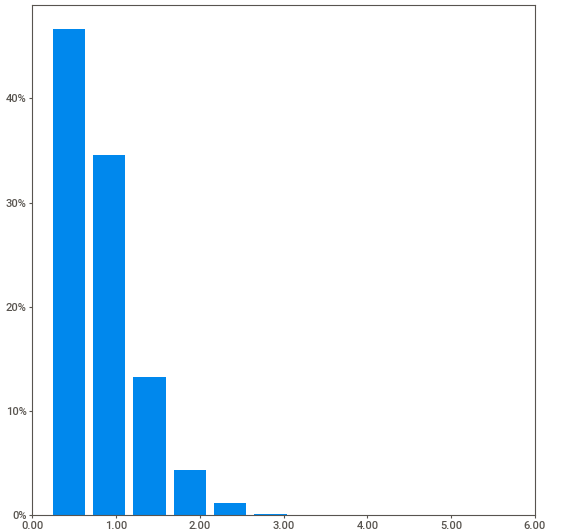
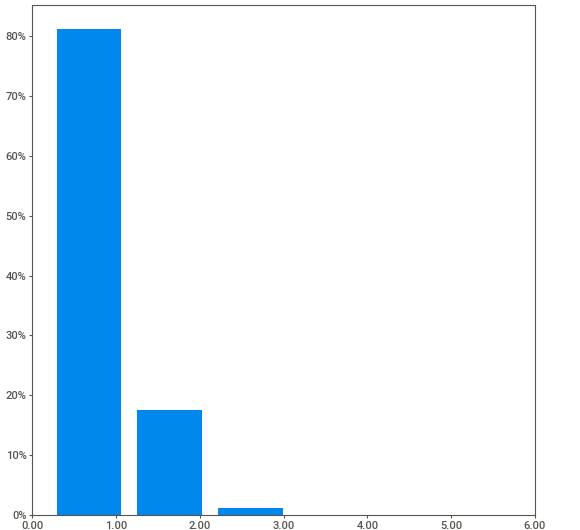
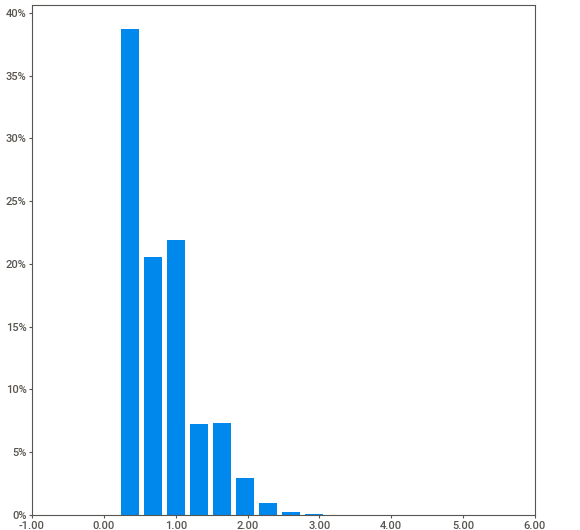
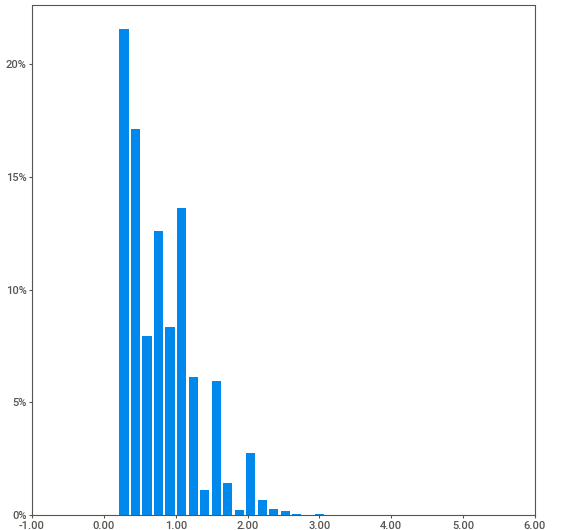
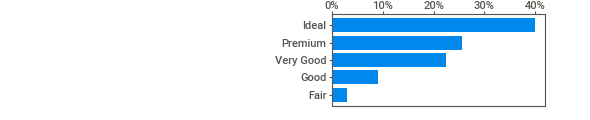
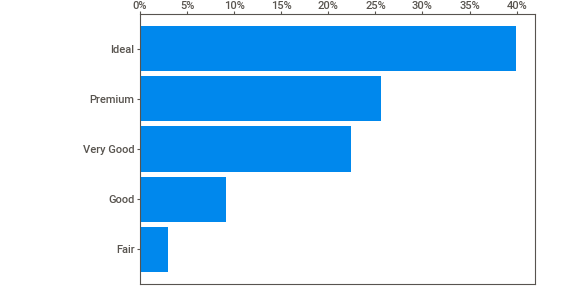
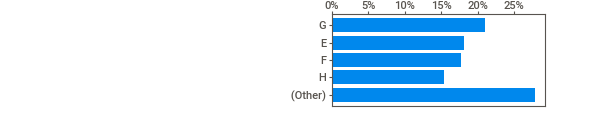
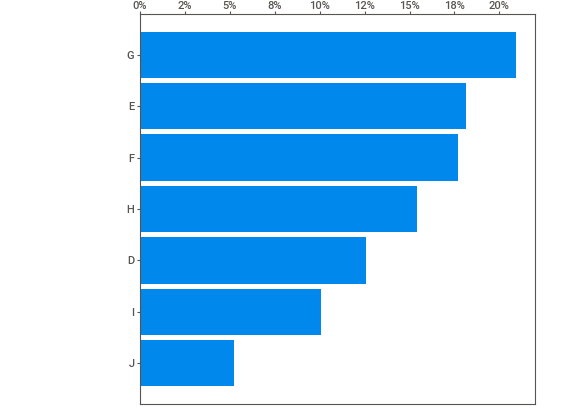
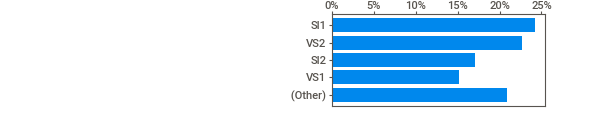
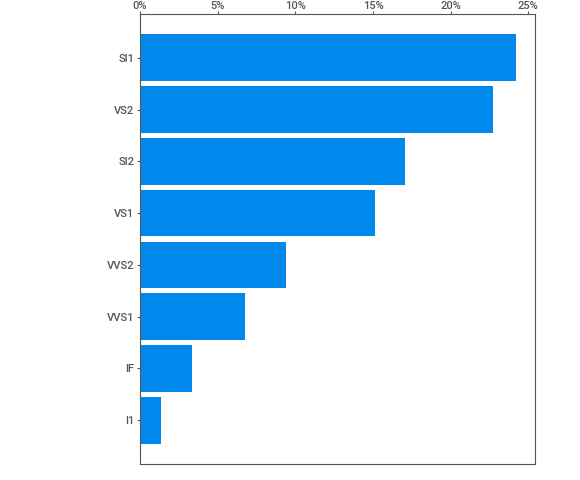
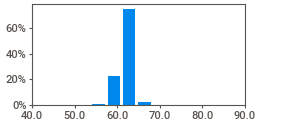
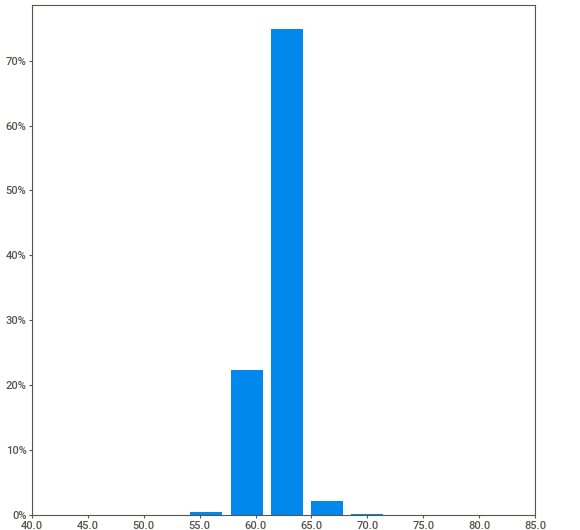
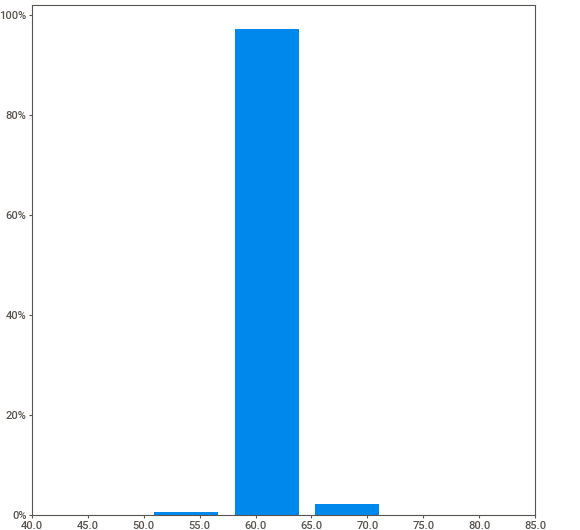
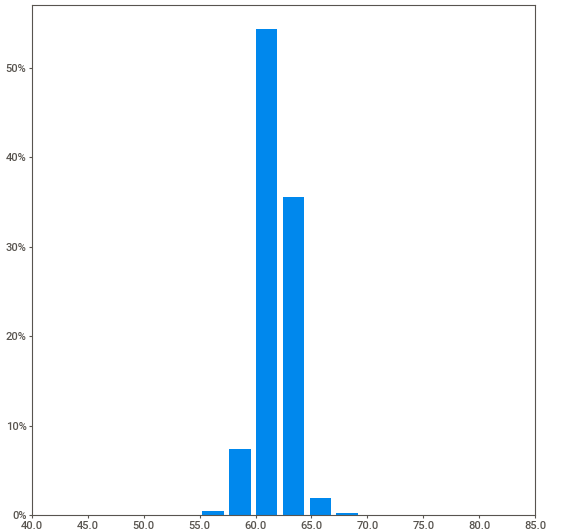
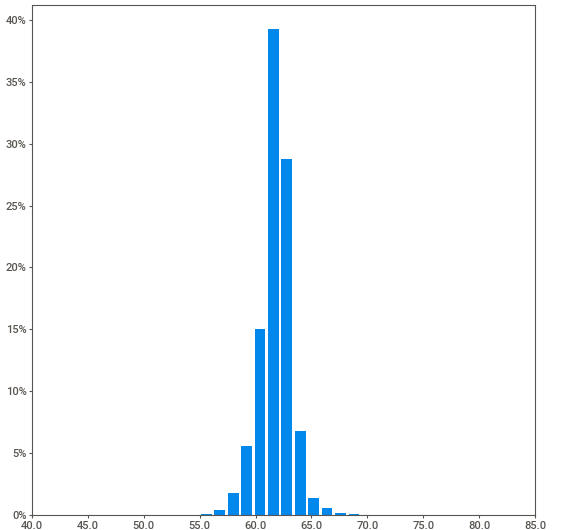
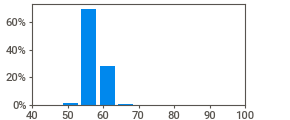
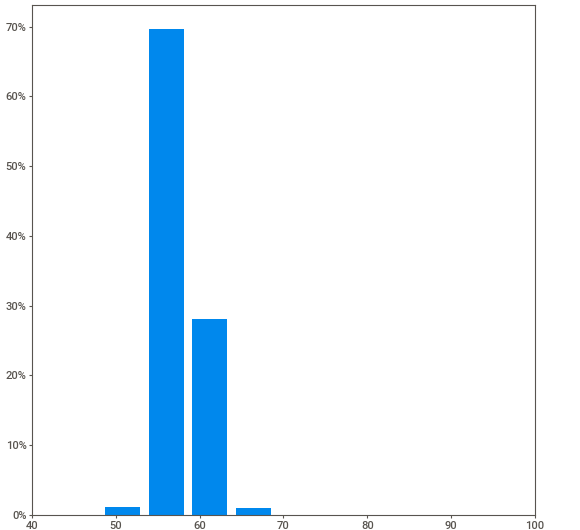
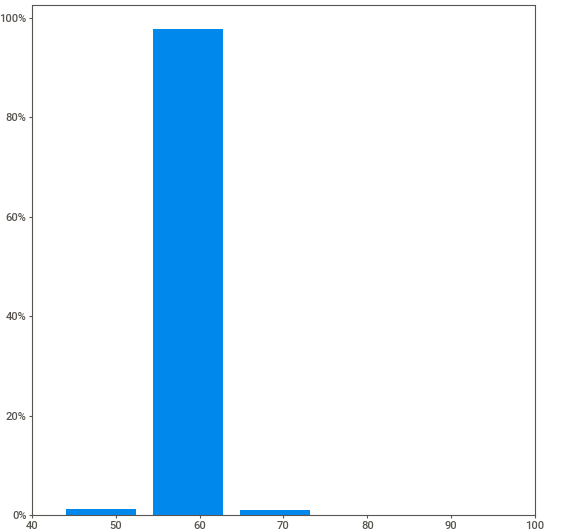
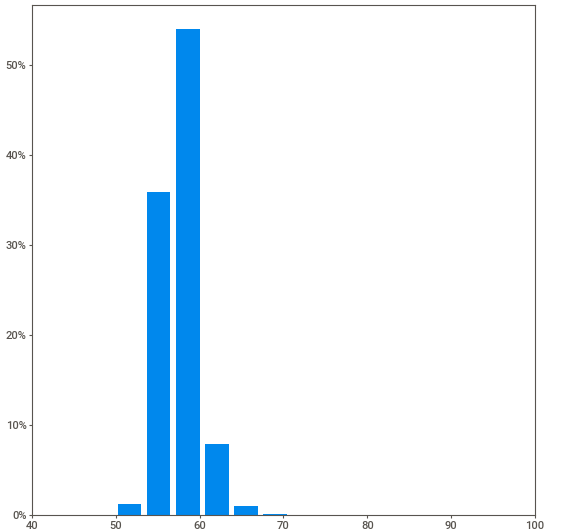
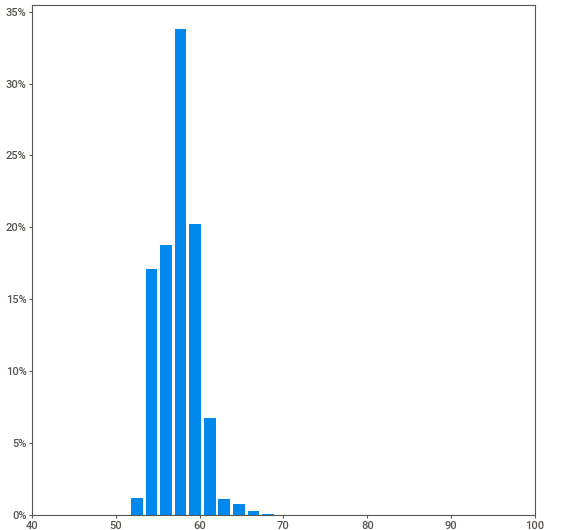
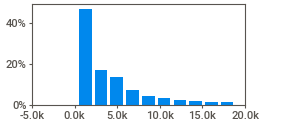
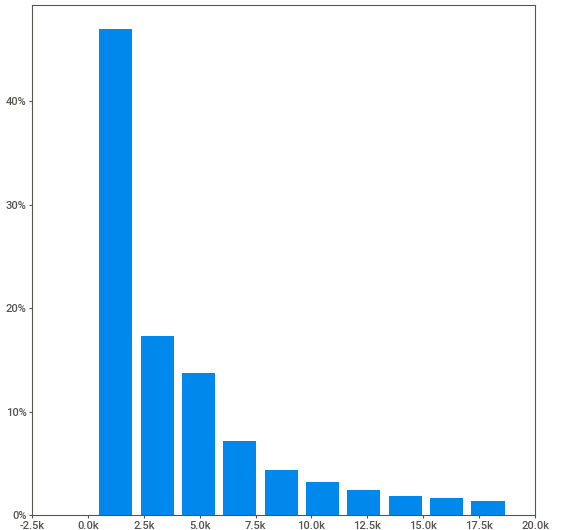
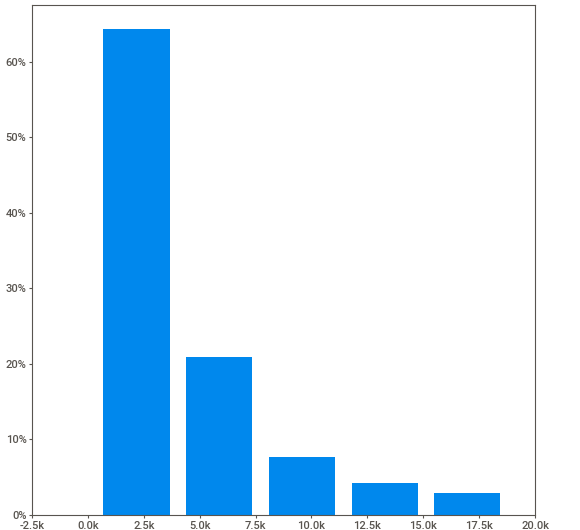
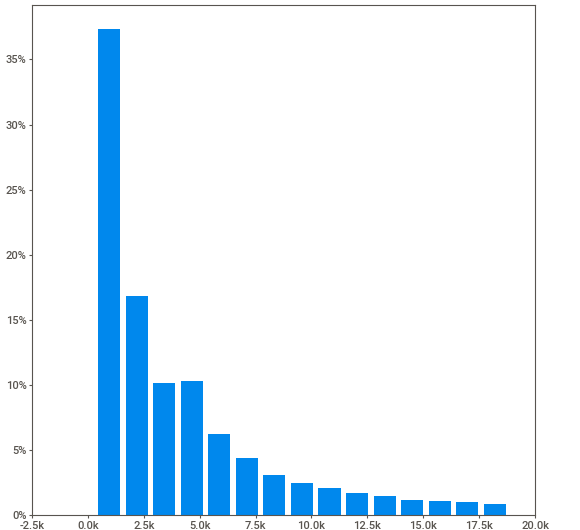
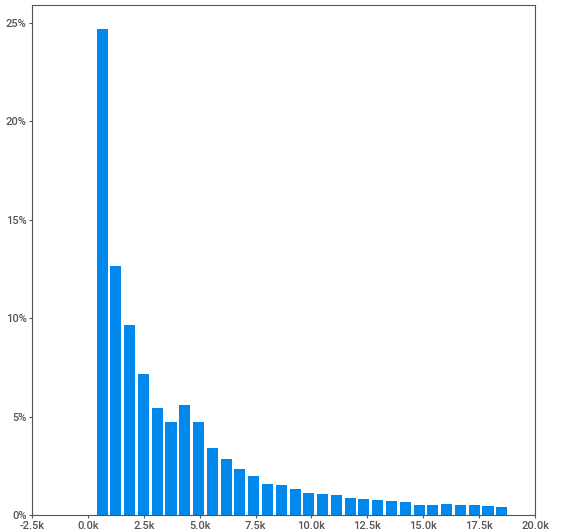
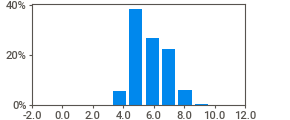
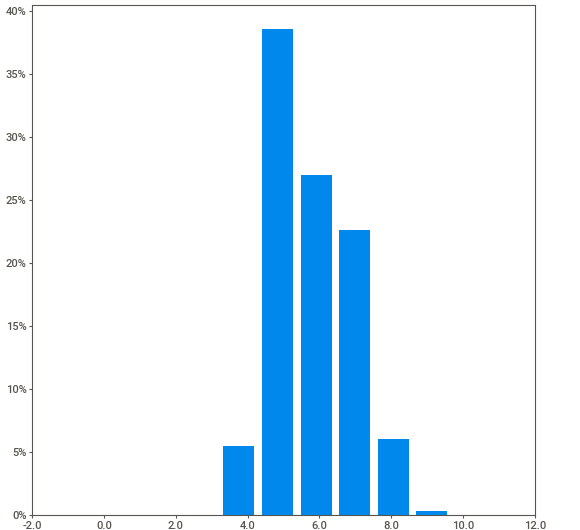
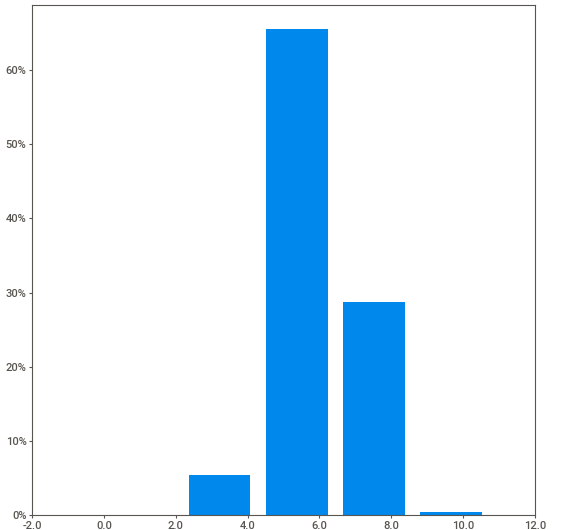
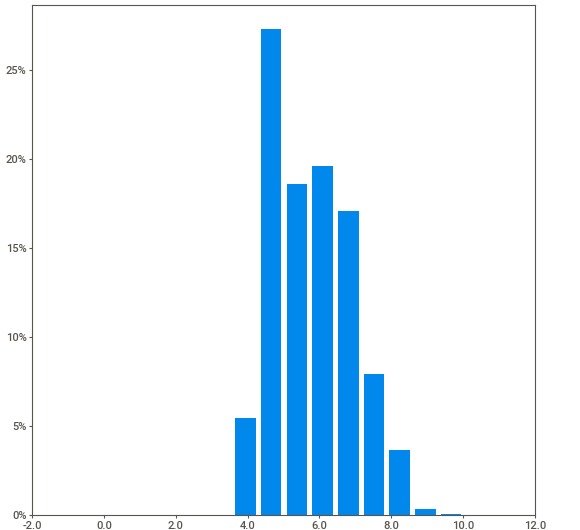
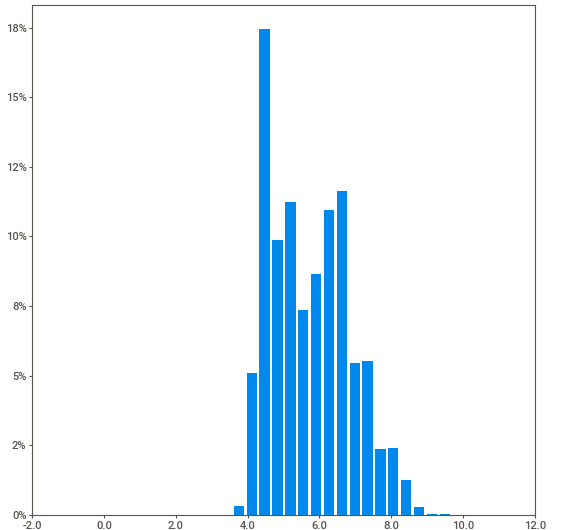
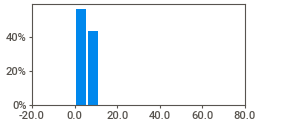
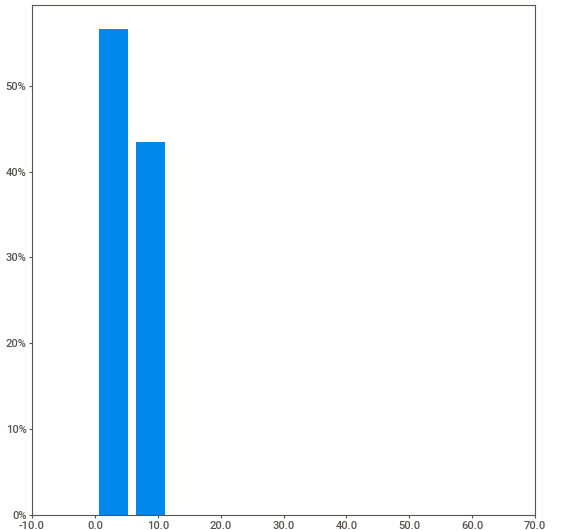
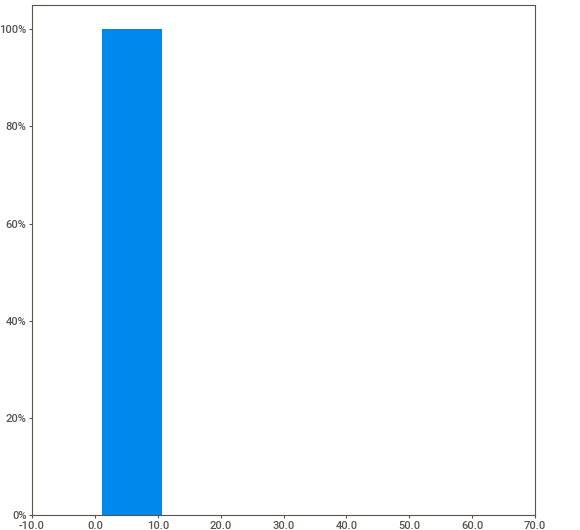
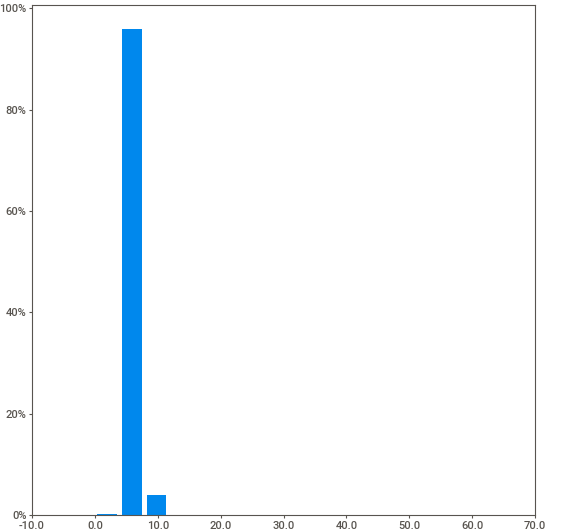
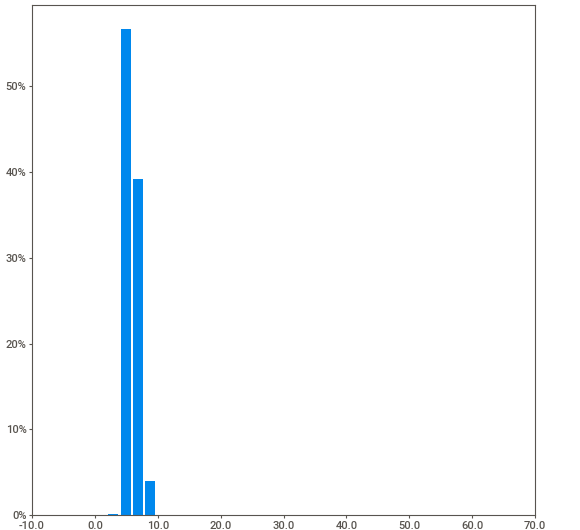
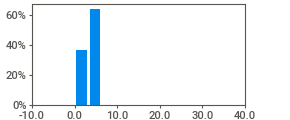
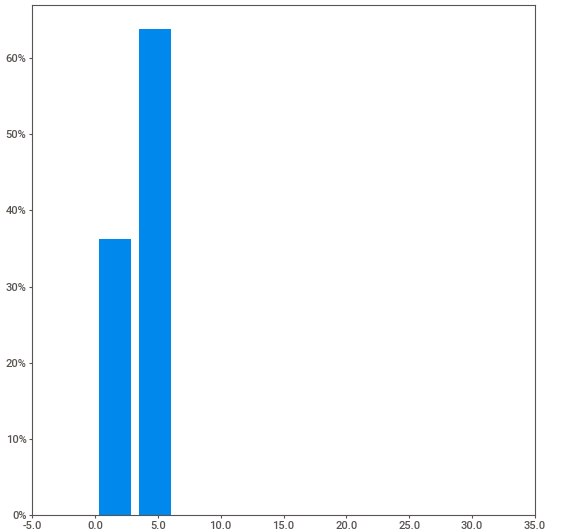
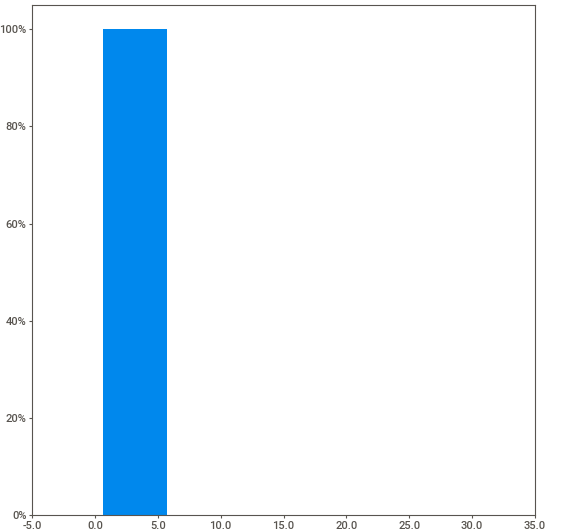
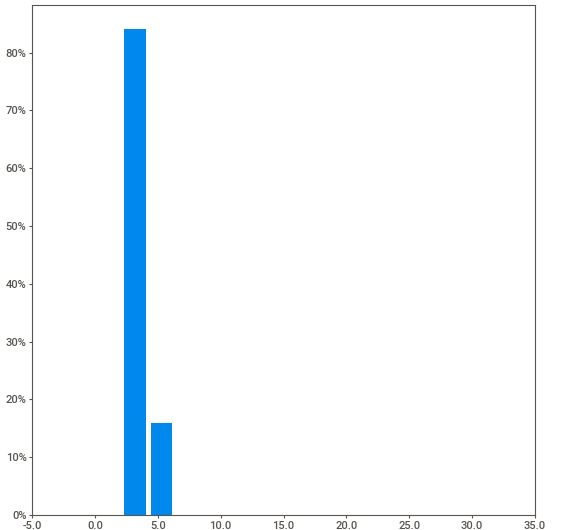
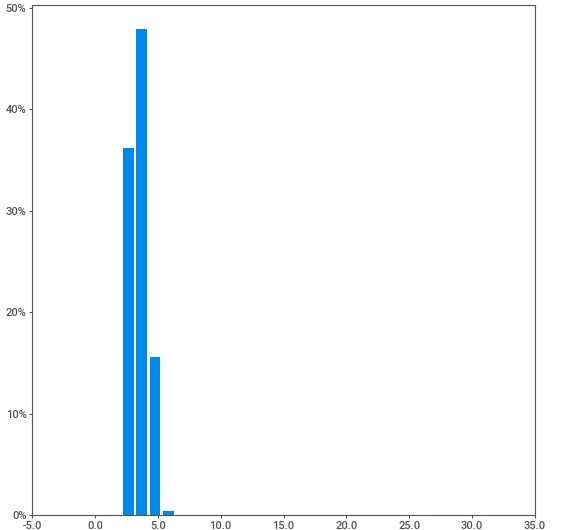
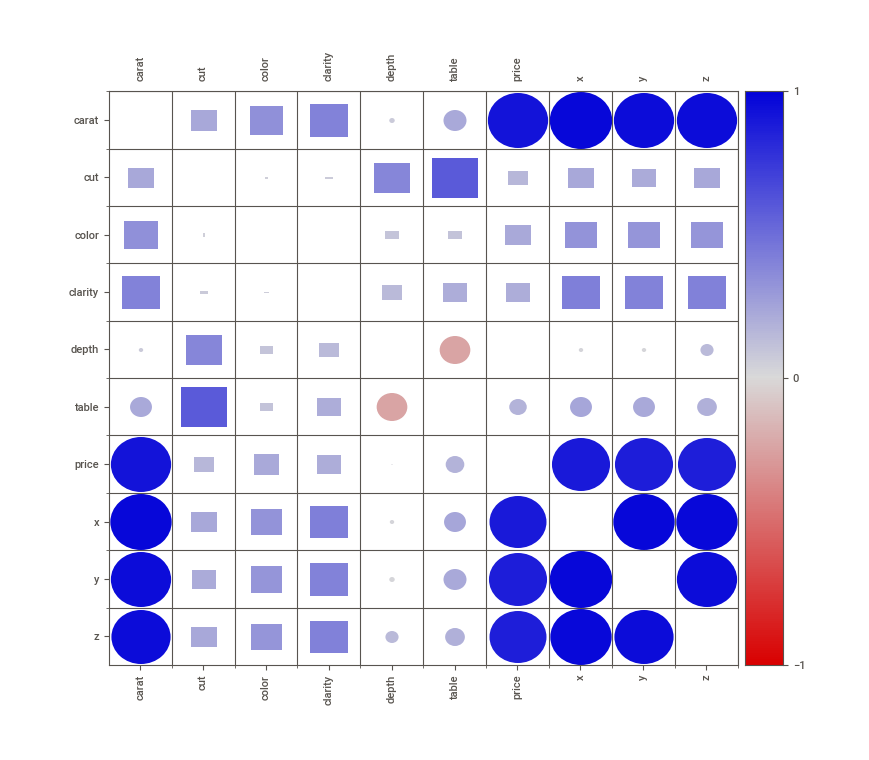
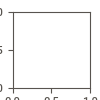

In [10]:
my_report = sv.analyze(df)
my_report.show_html()
HTML("/content/SWEETVIZ_REPORT.html")

### 欠損値の確認

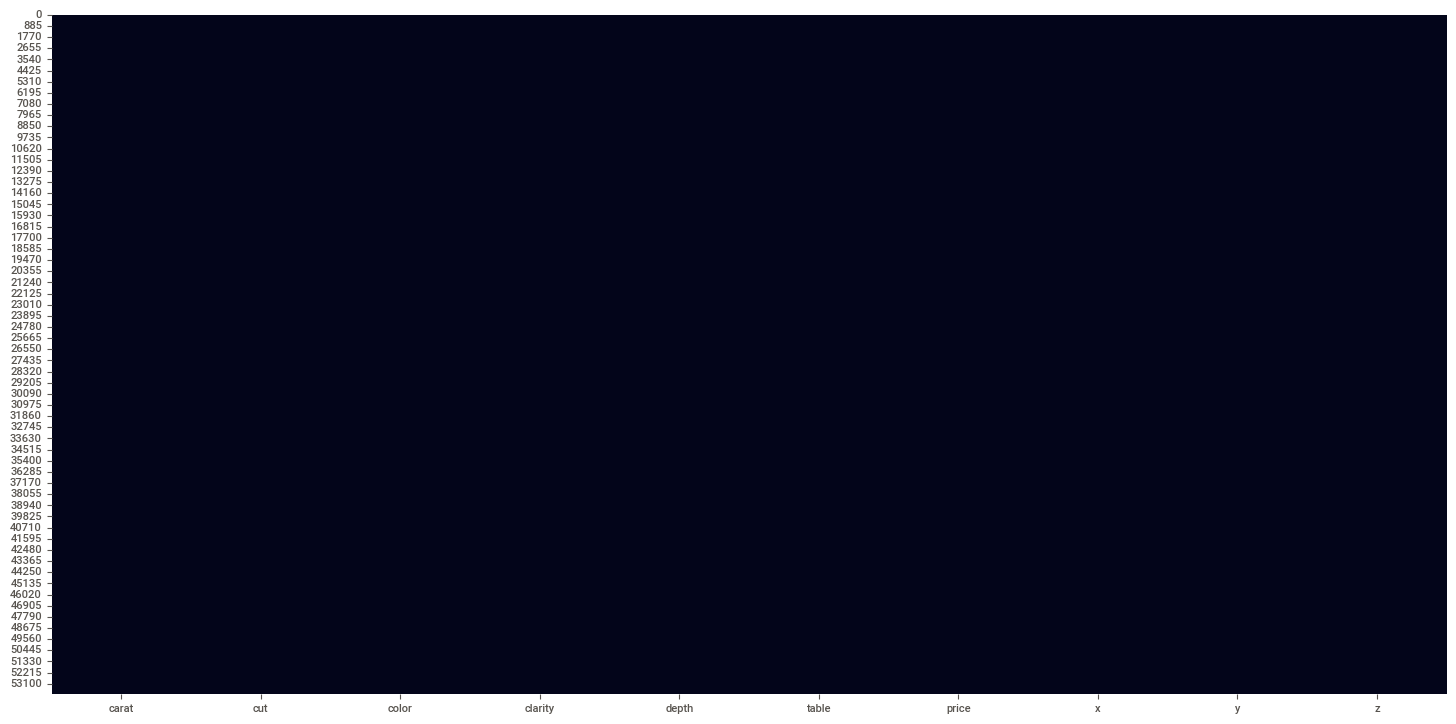

In [63]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.isnull(), cbar=False)
# 白い箇所がNull値

## カテゴリデータの分布確認

訓練と検証データのカテゴリ変数の差を算出

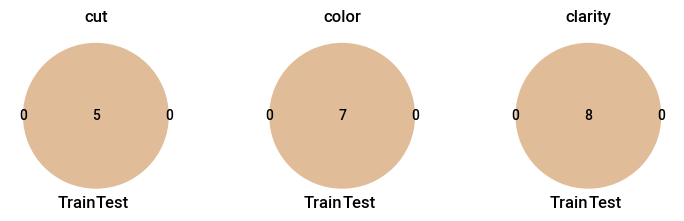

In [20]:
if not CFG.TestDataPath:
  train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
else:
  train_df = df.iloc[:train_len] 
  test_df = df.iloc[train_len:]

plt.figure(figsize=(10, 20))

for i, column in enumerate(df.select_dtypes(include=[object, "category"]).columns):

    plt.subplot(10, 4, i+1)
    set1 = set(train_df[column])
    set2 = set(test_df[column])

    plt.title(column)
    venn2([set1, set2], ('Train', 'Test'))

plt.tight_layout()
plt.show()

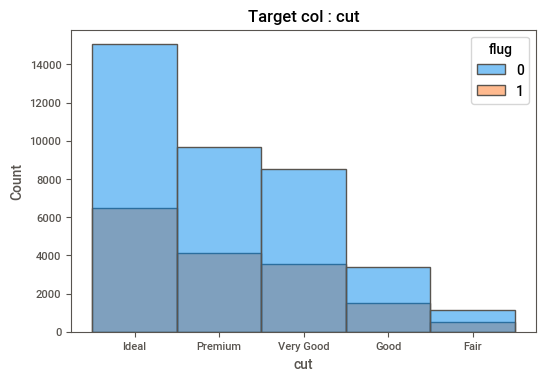

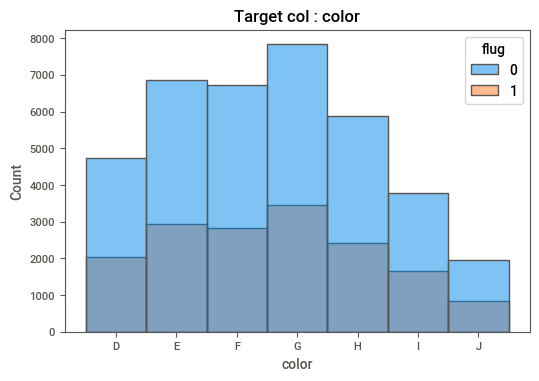

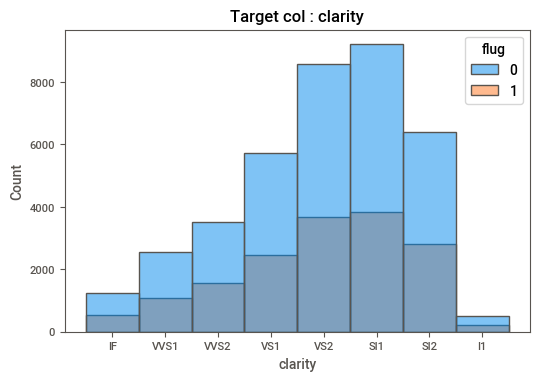

In [79]:
for i, column in enumerate(df.select_dtypes(include=[object, "category"]).columns):
  sns.histplot(df, x=column, hue="flug")
  plt.title(f"Target col : {column}")
  plt.show()

## 数値分布の確認

nanの数 train: 0 test: 0


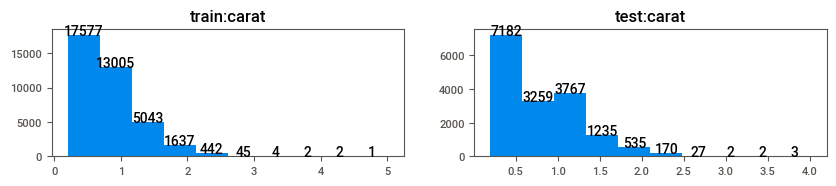

nanの数 train: 0 test: 0


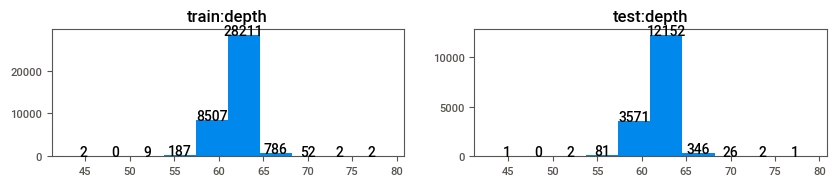

nanの数 train: 0 test: 0


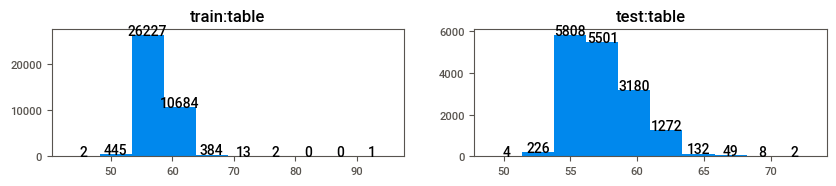

nanの数 train: 0 test: 0


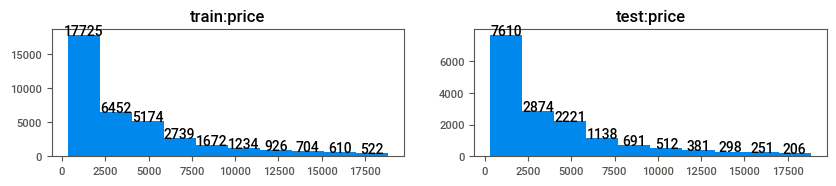

nanの数 train: 0 test: 0


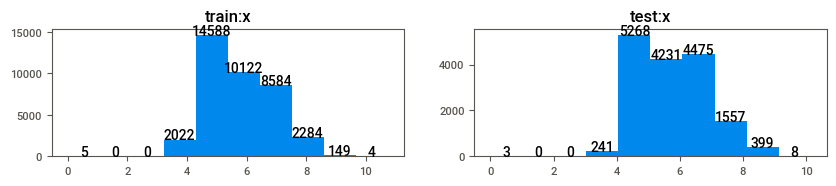

nanの数 train: 0 test: 0


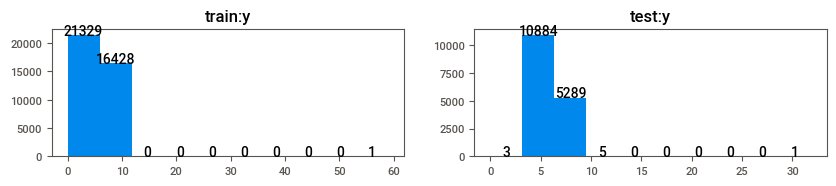

nanの数 train: 0 test: 0


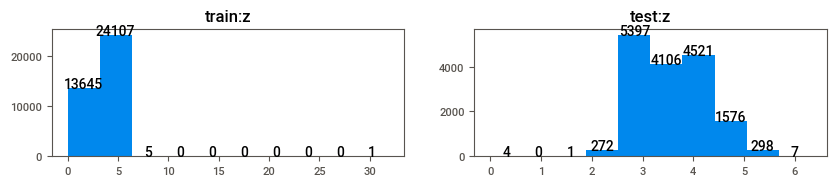

<Figure size 600x400 with 0 Axes>

In [21]:
for i, column in enumerate(df.select_dtypes(include='number').columns):

    print("nanの数 train:", train_df[column].isnull().sum(), "test:", test_df[column].isnull().sum())

    plt.figure(figsize=(10, 40))

    plt.subplot(20, 2, i*2+1)
    plt.title("train:" + column)
    n, bins, _  = plt.hist(train_df[column].dropna())
    xs = (bins[:-1] + bins[1:])/2
    ys = n.astype(int)
    for x, y in zip(xs, ys):
        plt.text(x, y, str(y), horizontalalignment="center")

    plt.subplot(20, 2, i*2+2)
    plt.title("test:" + column)
    n, bins, _  = plt.hist(test_df[column].dropna())
    xs = (bins[:-1] + bins[1:])/2
    ys = n.astype(int)
    for x, y in zip(xs, ys):
        plt.text(x, y, str(y), horizontalalignment="center")

    plt.show()

plt.tight_layout()

nanの数 train: 0 test: 0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


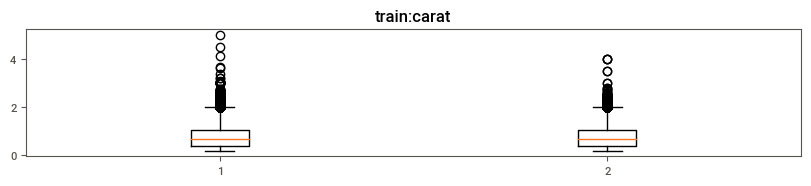

nanの数 train: 0 test: 0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


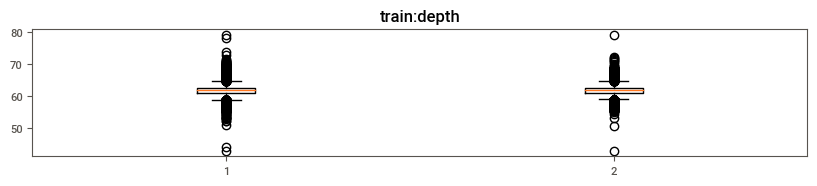

nanの数 train: 0 test: 0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


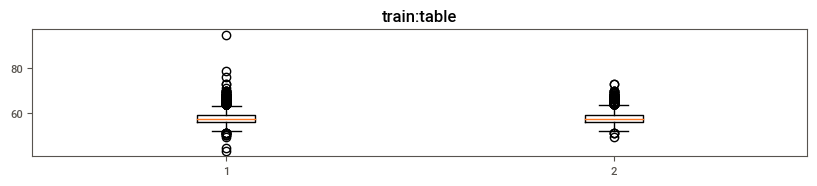

nanの数 train: 0 test: 0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


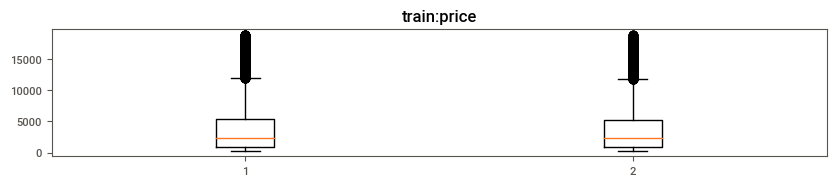

nanの数 train: 0 test: 0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


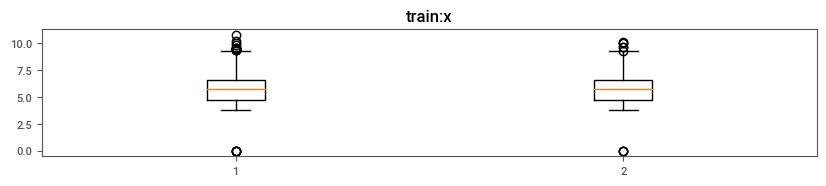

nanの数 train: 0 test: 0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


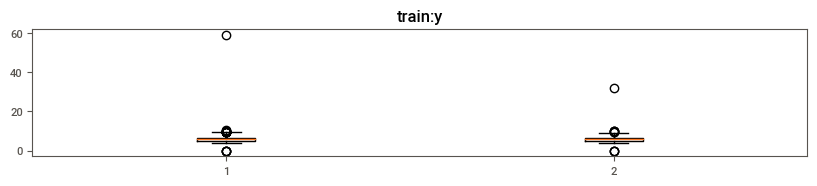

nanの数 train: 0 test: 0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


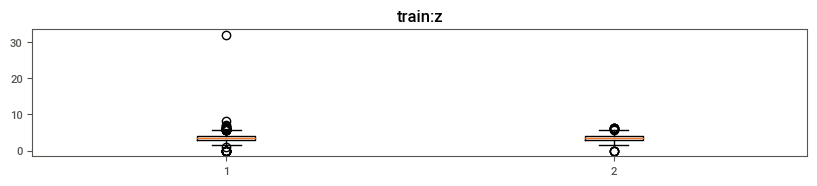

<Figure size 600x400 with 0 Axes>

In [26]:
for i, column in enumerate(df.select_dtypes(include='number').columns):

    print("nanの数 train:", train_df[column].isnull().sum(), "test:", test_df[column].isnull().sum())

    plt.figure(figsize=(10, 40))

    plt.subplot(20, 1, i+1)
    plt.title("train + test :" + column)
    box  = plt.boxplot([train_df[column].dropna(), test_df[column].dropna()])

    plt.show()

plt.tight_layout()

## 特徴量同士の相関係数

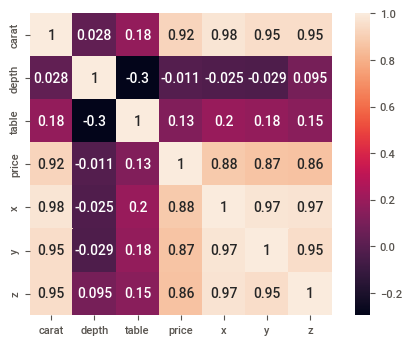

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), square=True, annot=True)

# fig, ax = plt.subplots(figsize=(12, 9)) 
# sns.heatmap(df_train.corr(), square=True, vmax=1, vmin=-1, center=0)

### 目的変数との相関係数

In [66]:
df.corr()[CFG.TargetCol].sort_values()

depth   -0.004225
table    0.122367
z        0.855583
y        0.863298
x        0.884821
carat    0.921729
price    1.000000
Name: price, dtype: float64

### 特徴量同士の散布図

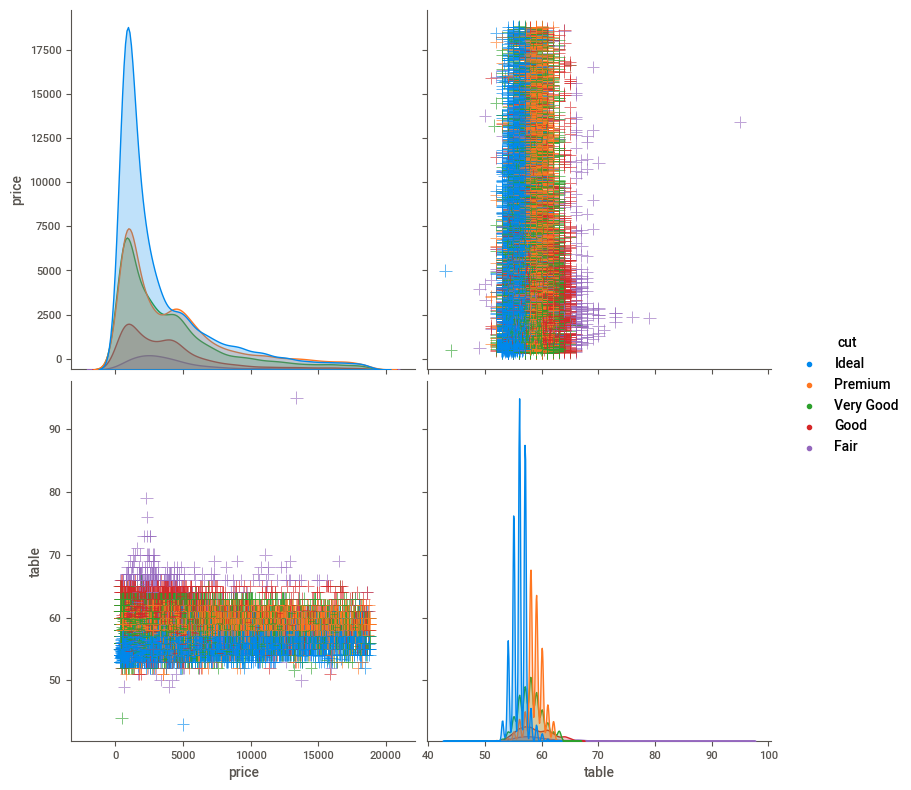

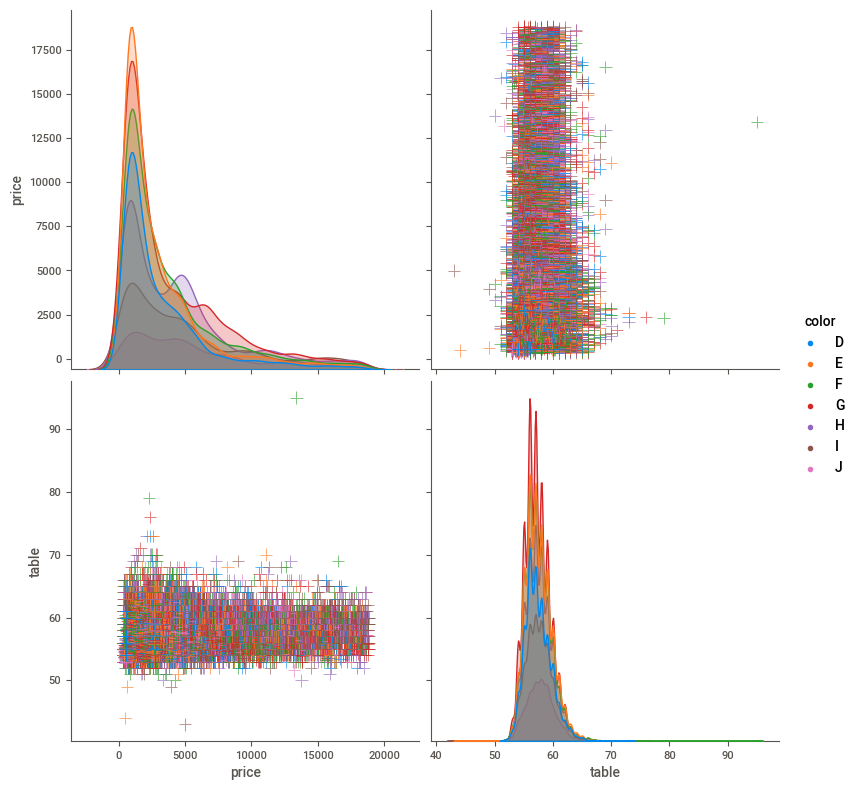

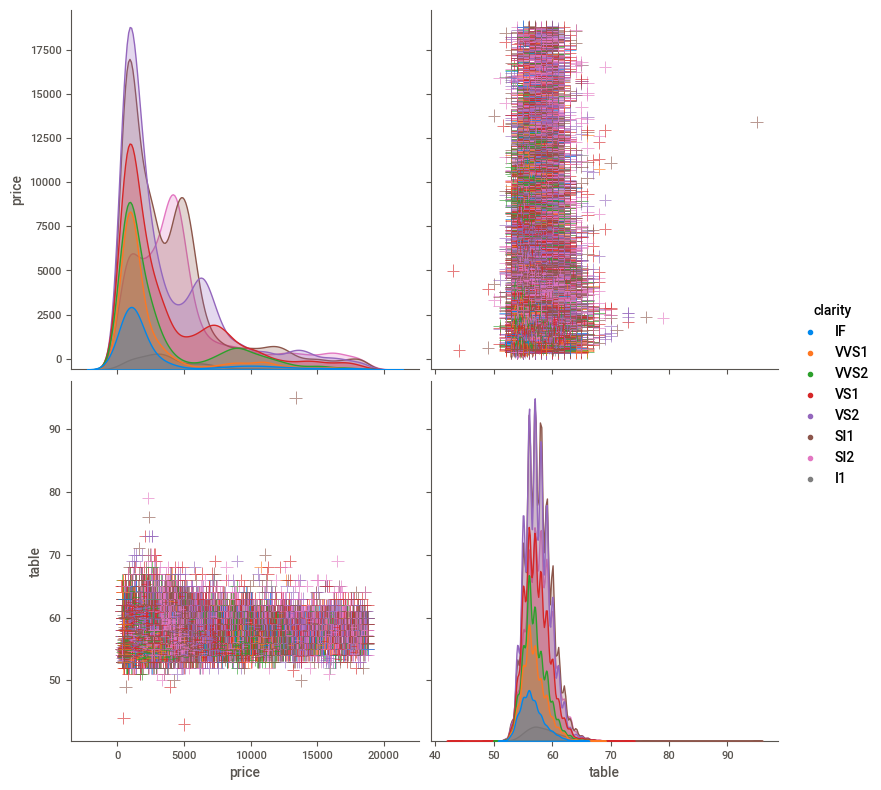

In [58]:
column = "cut"
target_cols =  ['price', 'table']
for i, column in enumerate(df.select_dtypes(include=[object, "category"]).columns):
  sns.pairplot(
            df, 
            hue=column,
            diag_kind = 'kde',
            plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
            markers='+',
            height = 4,
            vars = target_cols
            );

# hueに何か対象のカテゴリを入れ込む
# https://note.nkmk.me/python-seaborn-pandas-pairplot/

# ※ カテゴリ数や対象カラムが多い場合にはエラーが出ることがある。その時は諦めてカラム数を減らす。vars引数に対象カラムを指定する
## Error内容：FloatingPointError: underflow encountered in multiply